In [ ]:
import numpy as np 
import pandas as pd 

In [ ]:
data=pd.read_csv('dataset.csv')
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Target
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,0
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,0
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,0
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,0
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X = data.copy()

y = X.pop('Target')

X = data.drop(columns=['index','Target'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [30]


,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
17/17 [==============================] - 3s 68ms/step - loss: 0.3279 - binary_accuracy: 0.8741 - precision: 0.8982 - recall: 0.8729 - val_loss: 0.3759 - val_binary_accuracy: 0.8669 - val_precision: 0.8086 - val_recall: 0.9968
Epoch 2/200
17/17 [==============================] - 1s 41ms/step - loss: 0.1874 - binary_accuracy: 0.9270 - precision: 0.9292 - recall: 0.9407 - val_loss: 0.3781 - val_binary_accuracy: 0.8499 - val_precision: 0.7882 - val_recall: 0.9987
Epoch 3/200
17/17 [==============================] - 1s 40ms/step - loss: 0.1521 - binary_accuracy: 0.9375 - precision: 0.9435 - recall: 0.9443 - val_loss: 0.3595 - val_binary_accuracy: 0.8672 - val_precision: 0.8091 - val_recall: 0.9968
Epoch 4/200
17/17 [==============================] - 1s 40ms/step - loss: 0.1345 - binary_accuracy: 0.9440 - precision: 0.9430 - recall: 0.9573 - val_loss: 0.3298 - val_binary_accuracy: 0.8766 - val_precision: 0.8200 - val_recall: 0.9974
Epoch 5/200
17/17 [=============================

# Evaluation Metrics

Best Validation Loss: 0.07200107723474503
Best Validation Accuracy: 0.9735890030860901
Best Recall: 0.9987004399299622
Best Precision: 0.9795918464660645


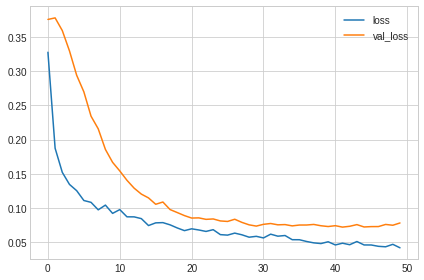

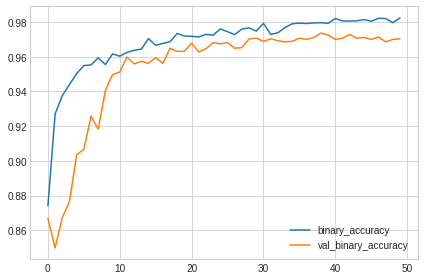

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
      f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
      f"\nBest Recall: {history_df['val_recall'].max()}" +\
      f"\nBest Precision: {history_df['val_precision'].max()}"
)